<a href="https://colab.research.google.com/github/Berubell9/Bellweb/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload file

In [42]:
import numpy as np
import pandas as pd

In [43]:
from google.colab import files
upload = files.upload()

Saving simple_loan.csv to simple_loan (1).csv


In [44]:
df = pd.read_csv('simple_loan.csv')
df

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no
5,middle,False,n,fair,no
6,middle,False,n,good,no
7,middle,True,y,good,yes
8,middle,False,y,excellent,yes
9,middle,False,y,excellent,yes


# Label encoding
https://www.facebook.com/datawizthailand/posts/359545884636800/
* Library คือ **sklearn** `from sklearn.preprocessing import LabelEncoder`
* `LabelEncoder().fit_transform` เเปลงตัวหนังสือเป็นตัวเลข เรียงเลขตามลำดับตัวอักษรข้างหน้า


---


* `.transform()` = เเปลงตัวหนังสือเป็นตัวเลข
* `.fit()` = ใส่ค่า



In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
labelencode = LabelEncoder()

In [47]:
# ไม่เอา target
X = df.drop(['target'],axis=1)
X.head(5)

,age,employed,own_house,credit
0,young,False,n,fair
1,young,False,n,good
2,young,True,n,good
3,young,True,y,fair
4,young,False,n,fair


In [53]:
# เอาเฉพาะ target
Y = df.target
Y.head(5)

0     no
1     no
2    yes
3    yes
4     no
Name: target, dtype: object

In [54]:
def labelEncode(data,columns):
  for i in columns:
    lb = labelencode.fit_transform(data[i])
    # เพิ่ม _ที่ชื่อคอลัม
    data[i+'_'] = lb 

In [55]:
f_columns = ['age','employed','own_house','credit']
# เรียกใช้ function
labelEncode(X,f_columns)

In [56]:
Y1 = labelencode.fit_transform(Y)
Y1

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [57]:
# คอลัมทั้งหมด
X.head(5)

,age,employed,own_house,credit,age_,employed_,own_house_,credit_
0,young,False,n,fair,2,0,0,1
1,young,False,n,good,2,0,0,2
2,young,True,n,good,2,1,0,2
3,young,True,y,fair,2,1,1,1
4,young,False,n,fair,2,0,0,1


In [58]:
# คอลัมที่มีเลข
X1 = X[['age_','employed_','own_house_','credit_']]
X1.head(5)

,age_,employed_,own_house_,credit_
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1


# Test Label Encoder

In [ ]:
encoder = LabelEncoder()
encoder.fit_transform(['a','a','b'])

# Model Costuction | Model Interpretation
ทำเป็นโมเดลโดยใช้ Naive Bays : https://www.geeksforgeeks.org/naive-bayes-classifiers/
* Library คือ sklearn `from sklearn.naive_bayes import CategoricalNB`
* model = CategoricalNB()
*`model.feature_log_prob_` คำนวณความน่าจะเป็น (ใส่ log ทำให้ค่าติดลบ,ค่าจะห่างจาก 0)
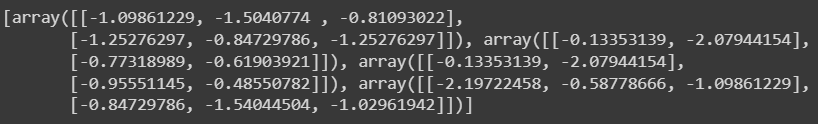
* `model.category_count_` นับจำนวนความถี่ของ attribute

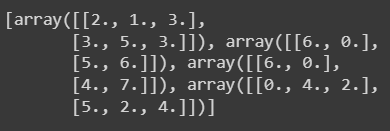

In [60]:
from sklearn.naive_bayes import CategoricalNB

In [61]:
model = CategoricalNB()

In [62]:
model.fit(X1,Y1)

CategoricalNB()

In [63]:
# ความน่าจะเป็นที่จะเกิด
for i in range(4):
  print()
  print(f_columns[i],":",model.feature_log_prob_[i])


age : [[-1.09861229 -1.5040774  -0.81093022]
 [-1.25276297 -0.84729786 -1.25276297]]

employed : [[-0.13353139 -2.07944154]
 [-0.77318989 -0.61903921]]

own_house : [[-0.13353139 -2.07944154]
 [-0.95551145 -0.48550782]]

credit : [[-2.19722458 -0.58778666 -1.09861229]
 [-0.84729786 -1.54044504 -1.02961942]]


In [64]:
for i in range(4):
  print()
  print(f_columns[i],":",model.category_count_[i])


age : [[2. 1. 3.]
 [3. 5. 3.]]

employed : [[6. 0.]
 [5. 6.]]

own_house : [[6. 0.]
 [4. 7.]]

credit : [[0. 4. 2.]
 [5. 2. 4.]]


# Model Prediction
New data
1. age =“middle”, employed = “true”, own_house = “y”, credit= “fair” = [0,1,1,1]
2. age =“old”, employed = “false”, own_house = “n”, credit= “good” = [1,0,0,2]

In [65]:
new_input = [[0,1,1,1],[1,0,0,2]]

In [67]:
print(model.predict(new_input))

[1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


In [68]:
print(model.predict_proba(new_input))

[[0.0721808  0.9278192 ]
 [0.53238717 0.46761283]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


# Invert Encoding
เเปลงเลขกลับเป็นตัวอักษร
* `LabelEncoder().classes_` = เเสดงค่าความน่าจะเป็นของคลาสภายใน Model 

In [69]:
new_predict = model.predict(new_input)
n=1
for i in new_predict:
  print('No',n,'=>',labelencode.classes_[i])
  n+=1

No 1 => yes
No 2 => no


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"
